# Image Classification on CIFAR-10 dataset using CNN and Keras

## This project focuses on creating a Convolutional Neural Network (CNN) in Keras with a TensorFlow backend, and train CNNs to solve Image Classification problem. To be precise, we will create and train and test the CNN model on the popular CIFAR-10 dataset.


### Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from sklearn.model_selection import train_test_split
from keras import regularizers
import csv
from keras.datasets import cifar10
import tensorflow

### Load the dataset from the cifar10 module and display one image from each class of images available in the training dataset

#### The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

#### 0: airplane
#### 1: automobile
#### 2: bird
#### 3: cat
#### 4: deer
#### 5: dog
#### 6: frog
#### 7: horse
#### 8: ship
#### 9: truck

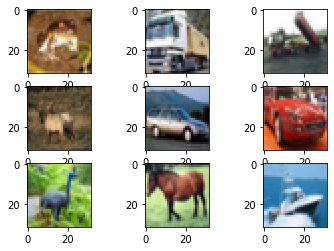

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
# show the plot

plt.show()

### The pixel values are in the range of 0 to 255 for each of the red, green and blue channels.

### It is good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 by dividing each value by the maximum observation which is 255.

### The data is loaded as integers, so we must cast it to floating point values in order to perform the division.

In [4]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### The output variables are defined as a vector of integers from 0 to 1 for each class. 
### We can use a one hot encoding to transform them into a binary matrix in order to best model the classification problem. We know there are 10 classes for this problem, so we can expect the binary matrix to have a width of 10.

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Building a Convolutional Neural Network Model

### We can summarize our network architecture as follows:

##### Convolutional input layer, 32 feature maps with a size of 3×3 and a rectifier activation function.Dropout layer at 20%. Convolutional layer, 32 feature maps with a size of 3×3 and a rectifier activation function.Max Pool layer with size 2×2.

##### Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function. Dropout layer at 20%. Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.

##### Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function. Dropout layer at 20%. Convolutional layer,128 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.

##### Convolutional layer, 512 feature maps with a size of 3×3 and a rectifier activation function. Dropout layer at 20%. Convolutional layer,512 feature maps with a size of 3×3 and a rectifier activation function. Max Pool layer with size 2×2.

##### Flatten layer.
##### Dropout layer at 20%. Fully connected layer with 1028 units with batch normalization and a rectifier activation function. Dropout layer at 50%. Fully connected layer with 512 units with batch normalization and a rectifier activation function.

##### Dropout layer at 20%.
##### Fully connected output layer with 10 units and a softmax activation function

In [6]:
from keras.models import load_model


"""
model = Sequential()
model.add(Conv2D(32,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3 ),padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer

model.add(Dropout(0.2))
model.add(Dense(1028))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))"""

"\nmodel = Sequential()\nmodel.add(Conv2D(32,(3,3 ),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(32, (3, 3),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(64,(3,3 ),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(64,(3,3 ),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\n\nmodel.add(Conv2D(128,(3,3 ),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(128, (3, 3),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(512,(3,3 ),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Conv2D(512, (3, 3),padding = 'same'))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Flatten())\n\n# Fully connected layer\n\nmodel.add(Dropo

### Summary Statistics of the layers of the built model.

In [7]:
model=load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

### Compiling the model using suitable loss function and optimizer algorithm

In [8]:
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Fitting the model for respective train and test data sets for certain number of epochs with confined batch size to get high accuracy

In [16]:
tensorflow.keras.backend.clear_session()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=250)

Epoch 1/10
200/200 [==============================] - 237s 1s/step - loss: 0.0656 - accuracy: 0.9765 - val_loss: 0.6994 - val_accuracy: 0.8422
Epoch 2/10
200/200 [==============================] - 231s 1s/step - loss: 0.0613 - accuracy: 0.9784 - val_loss: 0.6772 - val_accuracy: 0.8465
Epoch 3/10
200/200 [==============================] - 228s 1s/step - loss: 0.0603 - accuracy: 0.9795 - val_loss: 0.6645 - val_accuracy: 0.8484
Epoch 4/10
200/200 [==============================] - 226s 1s/step - loss: 0.0590 - accuracy: 0.9795 - val_loss: 0.6655 - val_accuracy: 0.8513
Epoch 5/10
200/200 [==============================] - 240s 1s/step - loss: 0.0588 - accuracy: 0.9791 - val_loss: 0.6804 - val_accuracy: 0.8494
Epoch 6/10
200/200 [==============================] - 249s 1s/step - loss: 0.0573 - accuracy: 0.9802 - val_loss: 0.6859 - val_accuracy: 0.8458
Epoch 7/10
200/200 [==============================] - 249s 1s/step - loss: 0.0579 - accuracy: 0.9800 - val_loss: 0.6684 - val_accuracy: 0.8497

In [1]:
model.save("model.h5")

NameError: name 'model' is not defined

### Displaying the Testing dataset of our problem

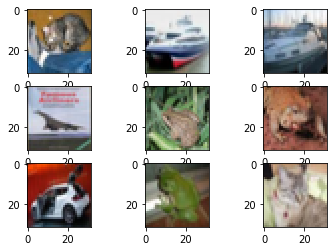

In [9]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_test[i])

### Evaluating the model with testing data set

In [26]:
score = model.evaluate(X_test, y_test)
print(score)

313/313 [==============================] - 21s 68ms/step - loss: 0.6652 - accuracy: 0.8516
[0.6651536822319031, 0.8515999913215637]


### Loss and Accuracy of the model with respect to testing dataset

In [27]:
print('Test loss: ', score[0])
print('Test Accuracy', score[1])

Test loss:  0.6651536822319031
Test Accuracy 0.8515999913215637


### Testing the model using different kinds of pictures

#### We can use our saved model to make a prediction on new images.The model assumes that new images are color, they have been segmented so that one image contains one centered object, and the size of the image is square with the size 32×32 pixels.

#### First, we can load the image and force it to the size to be 32×32 pixels. The loaded image can then be resized to have a single channel and represent a single sample in a dataset. The load_image() function implements this and will return the loaded image ready for classification.

#### Importantly, the pixel values are prepared in the same way as the pixel values were prepared for the training dataset when fitting the final model, in this case, normalized.

In [28]:
import matplotlib.image as mpimg
import tensorflow as tf
def load_image(filename):
    # load the image
    img =tf.keras.preprocessing.image.load_img(filename, target_size=(32, 32))
    # convert to array
    img = tf.keras.preprocessing.image.img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

### Next, we can load the model  and call the predict_classes() function to predict the object in the image.

8


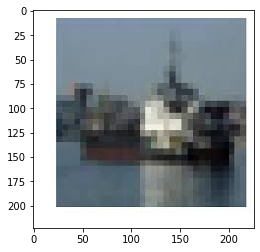

In [38]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\shipformini.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\shipformini.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

### As the ship belongs to class 8, we got 8 as result.

7


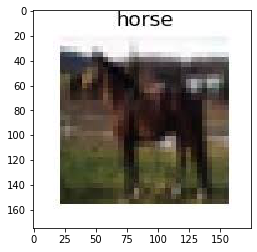

In [30]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\horseformini.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\horseformini.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

### As the horse belongs to class 7, we got 7 as result.

4


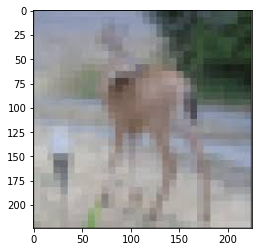

In [31]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\deerformini.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\deerformini.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

#### As the deer belongs to class 4, we got 4 as result

1


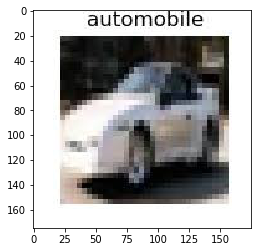

In [32]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\carformini.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\carformini.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

### As the car belongs to class 1, we got 1 as result


6


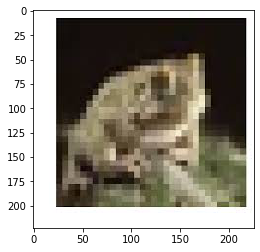

In [33]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\frog2formini.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\frog2formini.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

### As the frog belongs to class 6, we got 6 as result

3


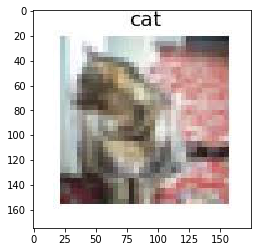

In [34]:
img=mpimg.imread(r'C:\Users\KAVYA SNIGDHA\Desktop\catforminii.jfif')
imgplot = plt.imshow(img)

k=load_image(r'C:\Users\KAVYA SNIGDHA\Desktop\catforminii.jfif')

result = model.predict_classes(k)
# predicting the class of loaded image
print(result[0])

### As the cat belongs to class 3, we got 3 as result